## Import Library and Initialize Global Variables

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,\
                            precision_score, recall_score, roc_curve,\
                            roc_auc_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

SEED = 41

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
import sys
print(sys.executable)

/home/ec2-user/anaconda3/envs/pytorch_latest_p36/bin/python


In [6]:
pip install wordcloud

     |████████████████████████████████| 366 kB 4.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_latest_p36/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Load Database/Import Data

In [8]:
df = pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Exploratory Data Analysis (EDA)

In [9]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [11]:
df.shape
#rows and columns

(20800, 5)

In [12]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
df=df.dropna()

In [14]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

<AxesSubplot:>

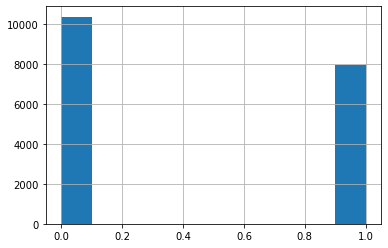

In [15]:
df['label'].hist()

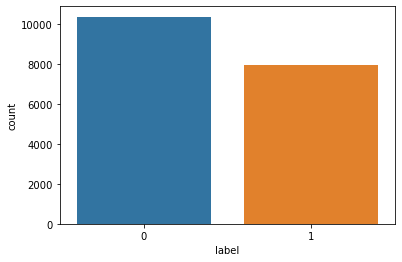

In [16]:
_ = sns.countplot(x="label", data=df)

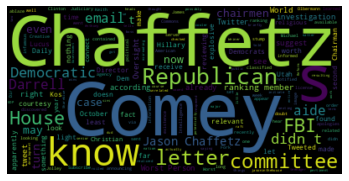

In [17]:
# WordCloud
text = df.text[0]
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
label1_df = df[df['label'] == 1]
print (label1_df)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
12        12  Russian Researchers Discover Secret Nazi Milit...   
...      ...                                                ...   
20788  20788  Maine’s Gov. LePage Threatens To ‘Investigate’...   
20791  20791  Lawyer Who Kept Hillary Campaign Chief Out of ...   
20793  20793  Idiot Who Destroyed Trump Hollywood Star Gets ...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                   author                                               text  \
0           Darrell Lucus  House Dem Aide: We Didn’t Even See Comey’s Let...   
2      Consortiumnews.com  Why the 

## Data Preprocessing/Feature Engineering

In [19]:
df.drop(['id','author','title'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18285 non-null  object
 1   label   18285 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


## Model Selection

### Split Data (Features/Target, Train/Validation/Testing)

In [21]:
X=df['text']
y=df['label']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

#### Feature Scaling (Normalization/Standardization)

In [23]:
#Bag of Words (Bow) method/technique
countVect = CountVectorizer()
countVect.fit(X)

X_train_cv = countVect.transform(X_train)
X_test_cv = countVect.transform(X_test)

len(countVect.get_feature_names())

160355

In [24]:
X_train_cv.shape

(14628, 160355)

### Train a Baseline Model using Logistic Regression 

In [25]:
%%time
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

CPU times: user 9.02 s, sys: 147 ms, total: 9.17 s
Wall time: 6.88 s


LogisticRegression()

In [26]:
y_pred = lr.predict(X_test_cv)
y_pred_proba = lr.predict_proba(X_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2072
           1       0.95      0.97      0.96      1585

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657



In [27]:
#Logistic regression score

In [28]:
y_pred = lr.predict(X_train_cv)
train_accuracy = accuracy_score(y_train,y_pred)

In [29]:
print('train accuracy score : ', train_accuracy)

train accuracy score :  0.999658189773038


In [30]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train_cv, y_train)

CPU times: user 50.5 s, sys: 53.4 ms, total: 50.6 s
Wall time: 50.6 s


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test_cv)
y_pred_proba = rf.predict_proba(X_test_cv)
print(classification_report(y_test, y_pred))

In [ ]:
#Random Forest results

In [ ]:
%%time
svm = SVC()
svm.fit(X_train_cv, y_train)

In [ ]:
y_pred = svm.predict(X_test_cv.toarray())
print(classification_report(y_test, y_pred))

### Train a Baseline Model using Logistic Regression with TF-IDF technique

In [ ]:
#TF-IDF method/technique
tfidf = TfidfVectorizer()
tfidf.fit(X)

X_train_cv = tfidf.transform(X_train)
X_test_cv = tfidf.transform(X_test)

len(tfidf.get_feature_names())

In [ ]:
%%time
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

In [ ]:
y_pred = lr.predict(X_test_cv)
y_pred_proba = lr.predict_proba(X_test_cv)
print(classification_report(y_test, y_pred))

### Evaluate Multiple Models and Select Best Model

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train_cv,y_train)

y_pred1=nb.predict(X_test_cv);
print(classification_report(y_test, y_pred1))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm=confusion_matrix(y_test,y_pred1);

acc=accuracy_score(y_test,y_pred1)
print("Accuracy is : %0.3f" % acc)


              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2072
           1       1.00      0.48      0.65      1585

    accuracy                           0.77      3657
   macro avg       0.86      0.74      0.74      3657
weighted avg       0.84      0.77      0.75      3657

Accuracy is : 0.773


### Hyperparameter Fine-tuning for final selected model

In [31]:
#TF-IDF method/technique
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X)

X_train_cv = tfidf.transform(X_train)
X_test_cv = tfidf.transform(X_test)

len(tfidf.get_feature_names())

160045

In [32]:
%%time
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)

CPU times: user 3.14 s, sys: 40.2 ms, total: 3.18 s
Wall time: 2.38 s


LogisticRegression()

In [33]:
y_pred = lr.predict(X_test_cv)
y_pred_proba = lr.predict_proba(X_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2072
           1       0.95      0.94      0.95      1585

    accuracy                           0.96      3657
   macro avg       0.95      0.95      0.95      3657
weighted avg       0.96      0.96      0.96      3657



In [ ]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train_cv, y_train)

In [ ]:
y_pred = rf.predict(X_test_cv)
y_pred_proba = rf.predict_proba(X_test_cv)
print(classification_report(y_test, y_pred))

In [ ]:
%%time
svm = SVC()
svm.fit(X_train_cv, y_train)

In [ ]:
y_pred = svm.predict(X_test_cv.toarray())
print(classification_report(y_test, y_pred))

In [ ]:
# SVM sith Stop words most accurate

In [ ]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

In [ ]:
#cross-validation score
cross_val_score(lr, X_test_cv, y_test, cv=10, scoring = 'accuracy').mean()

## Example

In [ ]:
def classify_message(text):
    text = tfidf.transform(text)
    predicted = lr.predict(text)
    probability = lr.predict_proba(text).max()*100

    if predicted==0:
        print("not Fake news")
        print('the probability percentage is:',round(probability))
    else:
        print("The news is Fake")
        print('the probability percentage is:',round(probability))

In [ ]:
test = ['Grandiose Ideas for Donald Trump Inaugural Give Way to Traditional - The New York Times']

classify_message(test)